In [83]:
import tensorflow
from tensorflow import keras 
from keras.models import Sequential 
from keras.layers import Dense 
from keras.callbacks import EarlyStopping
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split



In [84]:
df =pd.read_csv(r'C:\Users\SDS\Downloads\Social_Network_Ads.csv')

In [85]:
df.drop(columns=['User ID'],inplace=True)

In [86]:
df

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [87]:
df=pd.get_dummies(df,columns=['Gender'])


In [88]:
def my_function(x):
    if x==False:
        return 0
    else:
        return 1

In [89]:
df['Gender_Female']=df['Gender_Female'].apply(my_function)
df['Gender_Male']=df['Gender_Male'].apply(my_function)

In [90]:
x=df.drop(columns=['Purchased'])
x
y=df['Purchased']
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [91]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

Without sacling model training

In [92]:
model=Sequential()
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [93]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
history=model.fit(x_train,y_train,epochs=100,validation_data=(x_test,y_test),verbose=1)

Epoch 1/100


10/10 [==============================] - 2s 41ms/step - loss: 407.8389 - accuracy: 0.5469 - val_loss: 91.8391 - val_accuracy: 0.3500
Epoch 2/100
10/10 [==============================] - 0s 8ms/step - loss: 146.0736 - accuracy: 0.4656 - val_loss: 21.2140 - val_accuracy: 0.3500
Epoch 3/100
10/10 [==============================] - 0s 9ms/step - loss: 62.1540 - accuracy: 0.5125 - val_loss: 9.8199 - val_accuracy: 0.6500
Epoch 4/100
10/10 [==============================] - 0s 9ms/step - loss: 76.6931 - accuracy: 0.4719 - val_loss: 29.7870 - val_accuracy: 0.6500
Epoch 5/100
10/10 [==============================] - 0s 7ms/step - loss: 102.3099 - accuracy: 0.4781 - val_loss: 115.9989 - val_accuracy: 0.3500
Epoch 6/100
10/10 [==============================] - 0s 8ms/step - loss: 111.1269 - accuracy: 0.5219 - val_loss: 77.3008 - val_accuracy: 0.6500
Epoch 7/100
10/10 [==============================] - 0s 7ms/step - loss: 132.5070 - accuracy: 0.5469 - val_loss: 128.0928 - val_accuracy: 0.6500
Epoc

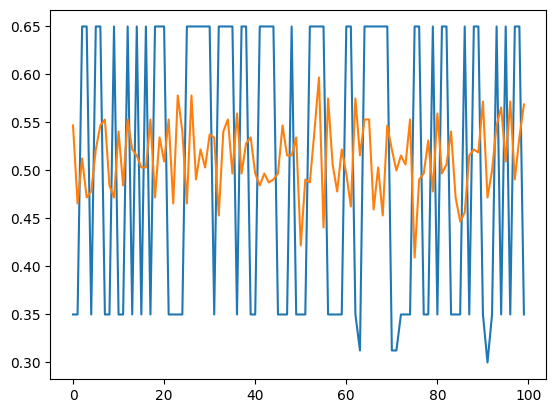

In [94]:
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])

Feature_scaling apply

In [95]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [96]:
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)


In [97]:
earlystop=EarlyStopping(monitor="val_loss",
    min_delta=0,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [98]:
model=Sequential()
model.add(Dense(256,activation='relu'))
model.add(Dense(120,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

In [99]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
history=model.fit(x_train_scaled,y_train,epochs=100,validation_data=(x_test_scaled,y_test),verbose=1)

Epoch 1/100
10/10 [==============================] - 2s 36ms/step - loss: 0.5965 - accuracy: 0.7500 - val_loss: 0.4504 - val_accuracy: 0.8750
Epoch 2/100
10/10 [==============================] - 0s 9ms/step - loss: 0.4374 - accuracy: 0.8344 - val_loss: 0.3166 - val_accuracy: 0.8625
Epoch 3/100
10/10 [==============================] - 0s 9ms/step - loss: 0.3593 - accuracy: 0.8562 - val_loss: 0.2518 - val_accuracy: 0.8750
Epoch 4/100
10/10 [==============================] - 0s 11ms/step - loss: 0.3217 - accuracy: 0.8687 - val_loss: 0.2265 - val_accuracy: 0.8875
Epoch 5/100
10/10 [==============================] - 0s 10ms/step - loss: 0.2950 - accuracy: 0.8813 - val_loss: 0.2035 - val_accuracy: 0.9250
Epoch 6/100
10/10 [==============================] - 0s 8ms/step - loss: 0.2783 - accuracy: 0.8969 - val_loss: 0.1950 - val_accuracy: 0.9250
Epoch 7/100
10/10 [==============================] - 0s 8ms/step - loss: 0.2668 - accuracy: 0.8938 - val_loss: 0.1953 - val_accuracy: 0.9375
Epoch 8/10

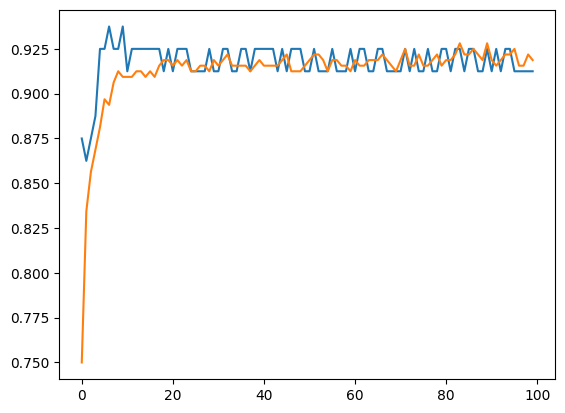

In [102]:
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])

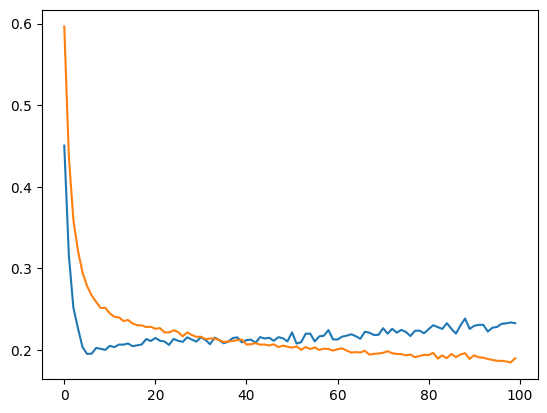

In [103]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])